In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/iop03/OneDrive/바탕 화면/갸울 방학 공부/ai/data/winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
y = df['residual sugar']
y

0       1.9
1       2.6
2       2.3
3       1.9
4       1.9
       ... 
1594    2.0
1595    2.2
1596    2.3
1597    2.0
1598    3.6
Name: residual sugar, Length: 1599, dtype: float64

In [4]:
x = df.drop('residual sugar', axis=1)
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [7]:
# SVR
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print(clf_svm.score(x_train, y_train))

0.05402588407454867


In [8]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.1868085195802884


In [9]:
# LR
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print(clf_lr.score(x_train, y_train))

0.4330091113626766


In [10]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.9886465857780672


In [11]:
# DT

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print(clf_dt.score(x_train, y_train))

1.0


In [12]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.0322790320451152


In [13]:
# RF
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)

pred_rf = rf_clf.predict(x_test)

print(rf_clf.score(x_train, y_train))

0.9417689095444531


In [14]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.8845940530831076


0.07852421351340266


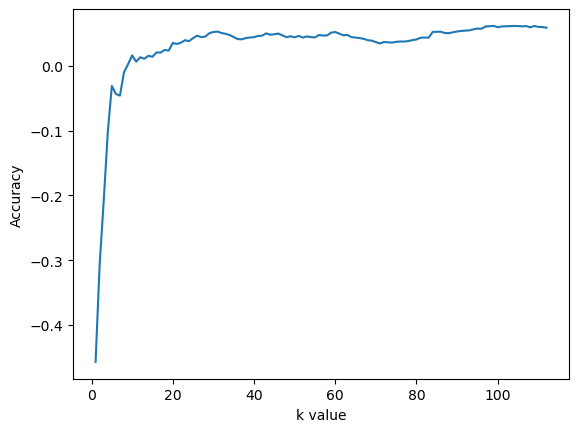

In [15]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  KNR = KNeighborsRegressor(n_neighbors = k)
  KNR.fit(x_train, y_train.values.ravel())

  find_accuracy.append(KNR.score(x_test, y_test))
  
pred_KNR = KNR.predict(x_test)
print(KNR.score(x_train, y_train))

plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()